# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

ANSWER: 
1) A model being linear refers to when the relationship between the feature matrix and the target matrix can be expressed as a weighted sum of the two. Linear, meaning if both inputs demonstrate some sort of relationship/correlation in contrast to other transformations to the data.
2) The coefficient depends on whether we include the intercept or not (in which most cases we want to include it). The coefficient can be interpreted differently depending on whether we decide to include the intercept or omit it. Including the intercept would mean that the coefficient is representative of the difference in the mean response. If we choose not to include the intercept then the coefficient now represents the actual mean response itself.
3) Linear regression is not the best method for classification since we can have predicted values that are outside the range of [0,1], which doesn't make sense regarding probabilities since they are restricted to that interval. Linear regression is better for continuous values (regression) rather than categorical values.
4) Signs of overfitting can include values too close to the training data and peaks specific to the training set: meaning, if the model is capturing too much noise or extreme outliers, the model is more so focused on memorizing the training data rather than understanding the general pattern/trend within the training set. If the model is resulting in a high R^2 value on the training data but not the test set, that means the model is performing great at fitting the original but not able to be applied to other datasets.
5) Multi-colinearity refers to when there is a high correlation between the predictor variables in the regression model. This can lead to higher variance values in the coefficients which makes estimates unstable/unclear. Two stage least squares can result in multi-colinearity if there is overlapping variation between x and the other predictors/features.
6) We can incorporate nonlinear relationships while maintaining a linear model by changing the either the features (x) or the response (y). For example, we can include polynomial terms or use log transformations of either x and y. Both methods keep the linearity between the platforms even if the features are nonlinear transformations.
7) We could add polynomial terms or use the log to transform x and The intercept is the expected y-value when all x is zero. the slope coefficient is the expected change in y over change in x, and the dummy variable coefficient is the difference of the expected value of y and the base group (which is set to 1 with the reference group set to 0).


**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [9]:
# setting up environment:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading dataset and previewing:
heart_df = pd.read_csv('./data/heart_hw.csv')
heart_df.head(5)

# Q1a) compute the proportion of control survival:
control_survival = heart_df[heart_df['transplant'] == 'control']['y'].mean()
treatment_survival = heart_df[heart_df['transplant'] == 'treatment']['y'].mean()

print(f"The proportion of people who survive in the control group who do not receive a transplant: {(control_survival)}")
print(f"The proportion of people who survive in the control group who received a transplant: {(treatment_survival)}")

difference = treatment_survival - control_survival
print(difference)

The proportion of people who survive in the control group who do not receive a transplant: 0.11764705882352941
The proportion of people who survive in the control group who received a transplant: 0.34782608695652173
0.23017902813299232


In [2]:
# Q1b) Difference between the treatment and control groups:
control_survival = heart_df[heart_df['transplant'] == 'control']['y'].mean()
treatment_survival = heart_df[heart_df['transplant'] == 'treatment']['y'].mean()

print(control_survival)


0.11764705882352941


In [3]:
# Q2) 
# setting dummy var: 0 as control and 1 for treatment
heart_df['transplant_dummy'] = (heart_df['transplant'] == 'treatment').astype(int)
# setting X and Y vars:
x = (heart_df['transplant'])
y = heart_df['y']

In [8]:
# using slr function from notes:
from sklearn.linear_model import LinearRegression

def custom_lr(x, y):
    """Custom linear regression (single or multiple predictors)."""
    x_bar = np.mean(x, axis=0)
    y_bar = np.mean(y)
    
    # center x and y
    x_centered = x - x_bar
    y_centered = y - y_bar
    
    # Solve for coefficients: (X'X)^-1 X'y
    beta = np.linalg.inv(x_centered.T @ x_centered) @ x_centered.T @ y_centered
    b0 = y_bar - np.dot(beta, x_bar)  # Intercept
    
    y_hat = b0 + x @ beta
    residuals = y - y_hat
    
    return {'b0': b0, 'betas': beta, 'y_hat': y_hat, 'residuals': residuals}

# creating dummy variable (control = 0, treatment = 1)
treatment_dummy = (heart_df['transplant'] == 'treatment').astype(int).values.reshape(-1, 1)
y = heart_df['y'].values

# plugging into function/model:
results = custom_lr(treatment_dummy, y)
print(f"Intercept (Control survival): {results['b0']:.3f}")
print(f"Treatment effect (ATE): {results['betas'][0]:.3f}")

Intercept (Control survival): 0.118
Treatment effect (ATE): 0.230


Q2) The values are identical to our initial averages calculated from part 1.

In [5]:
# Q3) adding age as a predictor
X = np.column_stack([treatment_dummy, heart_df['age'].values])
results_age = custom_lr(X, y)

print(f"Intercept (extrapolated): {results_age['b0']:.3f}")
print(f"Treatment effect (adjusted): {results_age['betas'][0]:.3f}")
print(f"Age effect: {results_age['betas'][1]:.3f}")

Intercept (extrapolated): 0.702
Treatment effect (adjusted): 0.265
Age effect: -0.014


Q3) The intercept increased significantly compared to the previous value. Before adding age, intercept value was 0.118 and with age it increased to 0.702. We should expect to see a negative relationship between age and survival or betas1 since the older you are, the lower your chances of survival.

In [6]:
# Add polynomial/interaction terms
age = heart_df['age'].values
X_flex = np.column_stack([
    treatment_dummy,
    age,
    age**2,                      # age²
    age * treatment_dummy.flatten()  # age×treatment
])

results_flex = custom_lr(X_flex, y)
print("Flexible model coefficients:", results_flex['betas'])

Flexible model coefficients: [ 7.03436930e-01  2.35283022e-02 -4.02762142e-04 -1.01668648e-02]


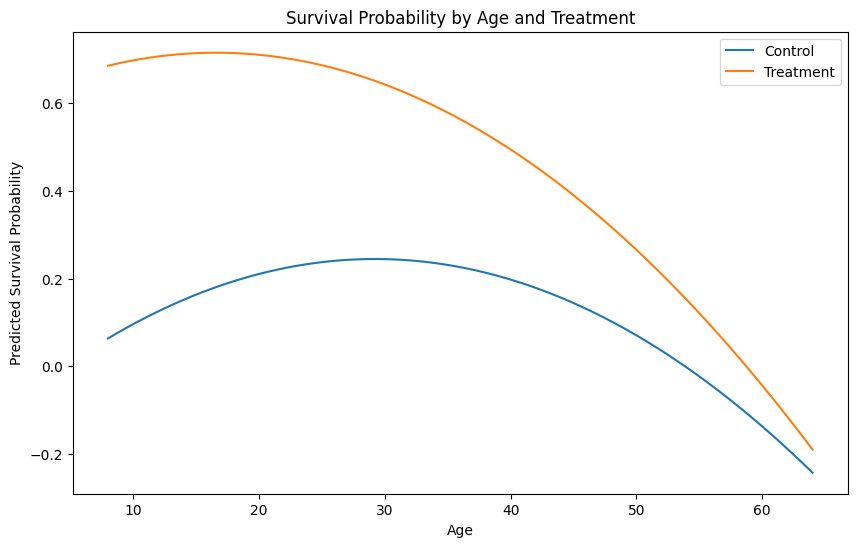

In [7]:
# Generate predictions for plotting
age_range = np.linspace(heart_df['age'].min(), heart_df['age'].max(), 100)
X_plot_control = np.column_stack([
    np.zeros_like(age_range),    # treatment=0
    age_range,
    age_range**2,
    np.zeros_like(age_range)     # age×treatment=0
])
X_plot_treatment = np.column_stack([
    np.ones_like(age_range),     # treatment=1
    age_range,
    age_range**2,
    age_range                    # age×treatment=age
])

y_hat_control = results_flex['b0'] + X_plot_control @ results_flex['betas']
y_hat_treatment = results_flex['b0'] + X_plot_treatment @ results_flex['betas']

# Plot:

# Scaffolding:
plt.figure(figsize=(10, 6))
plt.title('Survival Probability by Age and Treatment')

plt.plot(age_range, y_hat_control, label='Control')
plt.plot(age_range, y_hat_treatment, label='Treatment')

# == X-AXIS == 
plt.xlabel('Age')
# == Y-AXIS == 
plt.ylabel('Predicted Survival Probability')

plt.legend()


plt.show()

Q5) Both factors seem to have strong effects when it comes to determining chances of survival. The lower your age, the better your chances are but this trend is only clear in the Treatment curve, meaning that even if you are young; if you do not receive a treatment, your chances of survival are not as strong. This makes sense when considering that the ages the highest predicted survival possibility for the control treatment seems to be around the upper 20s. Adolescents and children would have higher risks since they are still developing, which would makes sense graphically seeing as the control curve is more symmetrical. 

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

ANSWER: 
1. $b^*$ is larger when the denominator is smaller, meaning that when variance (X) is low, then $b^*$ will be larger. If X is tightly grouped/clustered around Y then $b^*$ will be larger, as their variance is smaller. $b^*$ is smaller when there is *high* variance no covariance, meaning that there is a weak linear relationship between both X and Y. If the variance is high then the dominator is larger, meaning that $b^*$ will be smaller.
2. The intercept remains unaffected since the noise mean is equal to the mean (both are 0). The slope would become biased to 0 as well which leads to weaker predictions since we are underestimating the real relationship, meaning that the regression line would appear flatter than the actual.
3. Noise remains uncorrelated with both zi and yi. B attenuates due to the noise inflation of variance or the denominator under $b^*$, but does not add signal to the covariance or the numerator. We are left with a sort of diluted or weaker $b^*$ since the noise makes X seem less predictive of Y.
4. Attenuation bias leads to us underestimating its effects which leads to reduced predictive power, leaving us with weaker predictions. Investing the time and resources into data cleaning helps reduce the value of n which brings $b^*$ closer to the true $b^*$; overall, improving the model accuracy and actionable insights. 

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
